In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import statsmodels.api as sm_api
import matplotlib.pyplot as plt
import seaborn as searbornInst
from sklearn.metrics import mean_absolute_error, mean_squared_error
%matplotlib inline

In [176]:
df = pd.read_csv(r"F:\datacamp\housesalesprediction\kc_house_data.csv")

In [156]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [215]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [135]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [177]:
df.isnull().any()
df.fillna(method='ffill')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [200]:
y = df['price'].values
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [228]:
x = pd.DataFrame(df[['bedrooms', 'bathrooms','grade'
      ]])
x

,bedrooms,bathrooms,grade
0,3,1.00,7
1,3,2.25,7
2,2,1.00,6
3,4,3.00,7
4,3,2.00,8
5,4,4.50,11
6,3,2.25,7
7,3,1.50,7
8,3,1.00,7
9,3,2.50,7


In [229]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [230]:
predmodel = DecisionTreeRegressor(random_state=1)
y_pred = predmodel.fit(x_train, y_train)

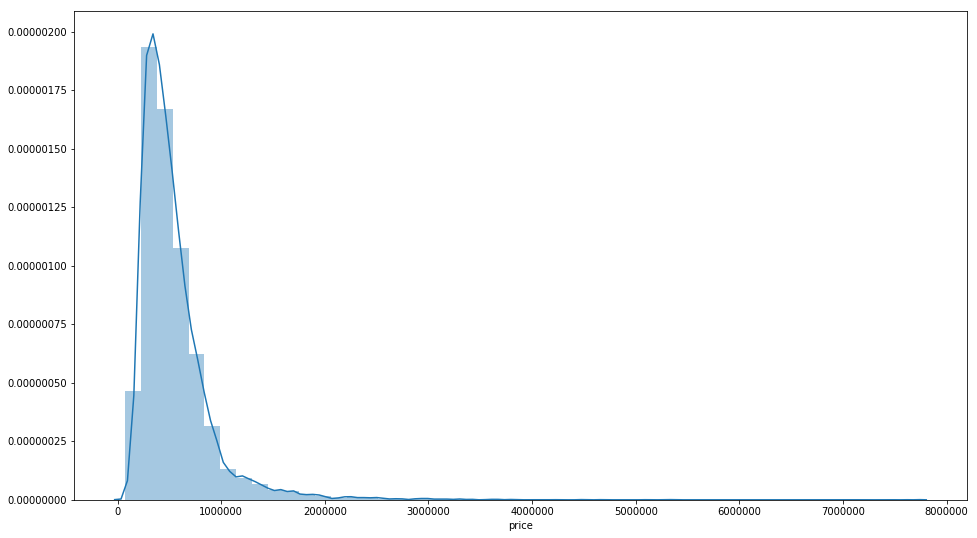

In [231]:
plt.figure(figsize=(16, 9))
plt.tight_layout()  
searbornInst.distplot(df['price'])

In [232]:
coeff = pd.DataFrame(y_pred.feature_importances_, x.columns, columns=['coefficient'])
coeff

,coefficient
bedrooms,0.038805
bathrooms,0.134521
grade,0.826674


In [233]:
predicted_y = y_pred.predict(x_test)


In [234]:
df3 =pd.DataFrame({'Actual' : y_test.flatten(), 'Predicted' : predicted_y.flatten()})
df3

,Actual,Predicted
0,459000.0,7.941081e+05
1,445000.0,3.721119e+05
2,1057000.0,3.278000e+06
3,732350.0,6.769612e+05
4,235000.0,2.793283e+05
5,555000.0,5.351151e+05
6,365000.0,4.928341e+05
7,685000.0,6.769612e+05
8,525000.0,3.983392e+05
9,449950.0,6.769612e+05


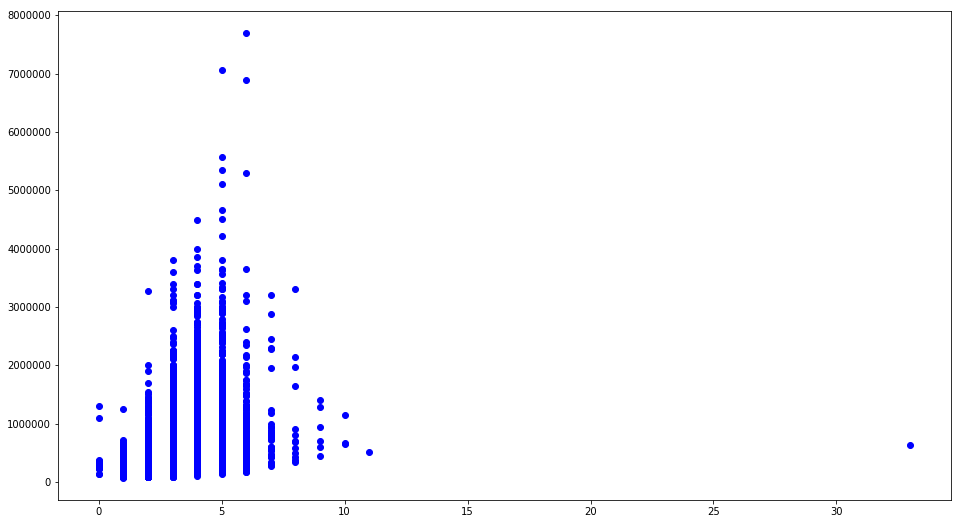

In [224]:
plt.figure(figsize=(16,9))
plt.scatter(df['bedrooms'], y, color='blue')

plt.show()

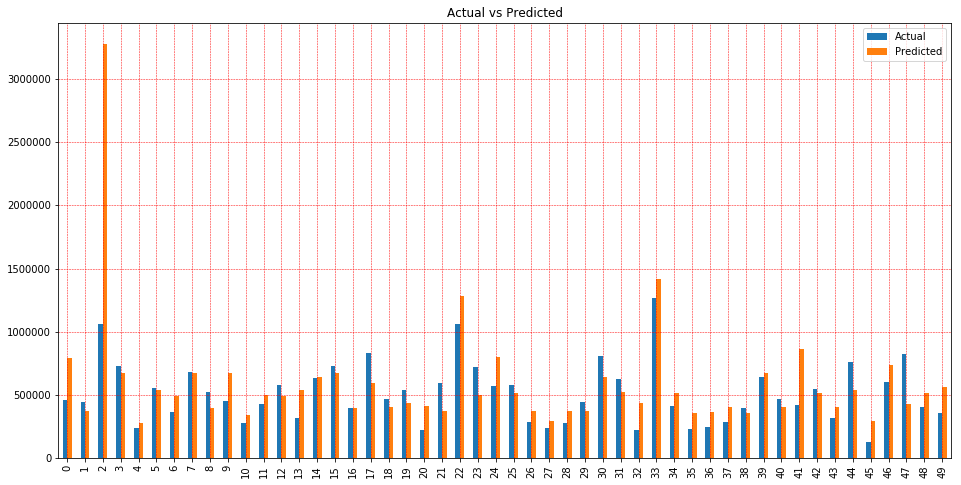

In [236]:
df1 = df3.head(50)
df1.plot(kind='bar', figsize=(16, 8))
plt.grid(which='major', linestyle='--', linewidth='0.5' , color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='blue')
plt.savefig('housepredict.pdf')
plt.title('Actual vs Predicted')
plt.show()

In [237]:
print('mean absolute error', mean_absolute_error(y_test, predicted_y))
print('mean squared error', mean_squared_error(y_test, predicted_y))
print('root mean absolute error', np.sqrt(mean_squared_error(y_test, predicted_y)))

mean absolute error 160919.47123958776
mean squared error 75909835155.77599
root mean absolute error 275517.39537781634


In [238]:

x2 = sm_api.add_constant(x)
estimation = sm_api.OLS(y,x2)
estimation2 = estimation.fit()
print(estimation2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     6099.
Date:                Wed, 11 Dec 2019   Prob (F-statistic):               0.00
Time:                        23:53:04   Log-Likelihood:            -3.0098e+05
No. Observations:               21613   AIC:                         6.020e+05
Df Residuals:                   21609   BIC:                         6.020e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.002e+06   1.35e+04    -74.268      0.0

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
